# Exercice 4 

In [27]:
# importation des librairies usuelles
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.special import factorial

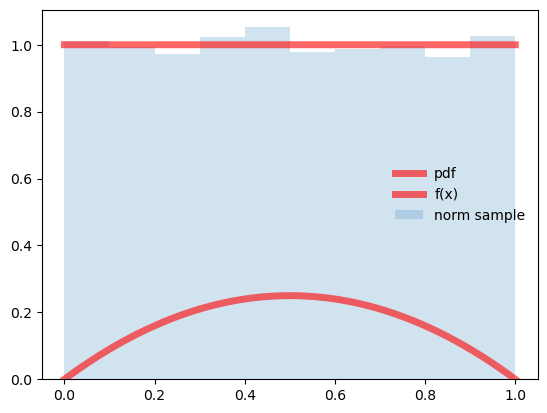

In [2]:
N_spl = 10000
unif = stats.uniform()                             # création du générateurs [0,1]
sample_X = unif.rvs(size=N_spl)                    # tirage d'une liste de N_spl nombres
sample_Y = unif.rvs(size=N_spl)                    
sample = list(zip(sample_X, sample_Y))             # création d'une liste de points 

# Fonction de densité de probabilité
x = np.linspace(0,1, N_spl)
f_x = x * (1 - x)
f_spl = sample_X * (1 - sample_X)
plt.plot(x,unif.pdf(x),'r-', lw=5, alpha=0.6, label='pdf') 
plt.plot(x,f_x,'r-', lw=5, alpha=0.6, label='f(x)')
plt.hist(sample_X, density=True, histtype='stepfilled', alpha=0.2,label="norm sample") 
plt.legend(loc='best', frameon=False)
plt.show()



# 1- Calcul de l'intégrale par Monte Carlo
On génère aléatoirement N_spl points sur U = [0,1]x[0,1]. L'intégrale s'obtient par le rapport du point sous la courbe et du nombre de points générés sur U : 
$$ I = \frac{N_{sous la courbe}}{N_{spl}} S$$

où S correspond à l'aire de la suface [0,1]x[0,1] à laquelle appartiennent les points générés.

In [3]:
# Trie des points générés aléatoirement :

sample_sous = []                  # stock les points sous la courbe
sample_dessus = []                # stock les points au dessus de la courbe

for i in range(N_spl):
    if sample[i][1] < f_spl[i]:
        sample_sous.append(sample[i])
    else:
        sample_dessus.append(sample[i])

# Estimation du nombre de point générés aléatoirement sous la courbe :
N_sous = len(sample_sous)  


# estimation de l'intégrale par la méthode de Monte Carlo :
S = 1                              # surface sur laquelle sont générés les points
I = N_sous / N_spl * S


print(I)

0.1754


Pour s'assurer de la cohérece du résultat  nous avons essayer plusieurs valeurs de N_spl (1000, 10000, 100000), la somme converge vers $ \frac{1}{6}$.

# 2- Calcul de l'incertitude

L'incertitude sur I est donnée par : $ \Delta I=\sqrt{Var[I]} =\frac{I}{n_{spl}} \sqrt{\frac{1-\frac{I}{S}}{\frac{I}{S}}}$


    

In [4]:
P = I/S
u_I = I/N_spl * np.sqrt((1 - P)/P)

print(u_I)

3.80308874469161e-05


# 3- Représentation graphique 

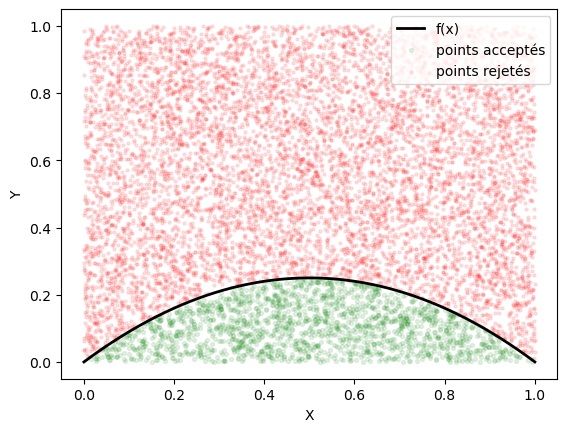

In [5]:
plt.plot(x, f_x, 'k-', lw=2, label='f(x)')
plt.scatter(*zip(*sample_sous), color='green', alpha=0.1, s=8, label='points acceptés')
plt.scatter(*zip(*sample_dessus), color='red', alpha=0.1, s=5, label='points rejetés')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend(loc='best')
plt.show()

# Exercice 5 : Loi de $\chi^2$

Soit un vecteur aléatoire $\vec{X}(X_1,...,X_n)$ à $n$ dimensions tel que pour $\forall i$:
$$ X_i \sim \mathcal{N}(0,1)$$

Les $X_i$ sont indépendants. Le code suivant permet de générer ces vecteurs :

In [6]:
nb = 100000 # nombre de vecteurs aléatoires
n=10      # dimension des vecteurs
means = np.zeros(n) # vecteur des espérances à n dimensions
sigmas = np.ones(n) # vecteur des variances à n dimensions

norm = stats.multivariate_normal(means,sigmas) # création du générateur avec une loi normale dans chaque dimension
x = norm.rvs(size=nb) # tirage de nb vecteurs aléatoires
print(x.shape)
print(x[0])

(100000, 10)
[ 0.18194023 -3.01089457  0.34447437 -0.64977887  0.88449283  1.55851564
  0.69946485  2.41974353 -0.82232899  1.23788551]


## Vérifions que la somme des $X_i^2$ suit une loi du $\chi^2$

Chi2 Stat: 89.55106929757993, p-value: 0.7409756337085797


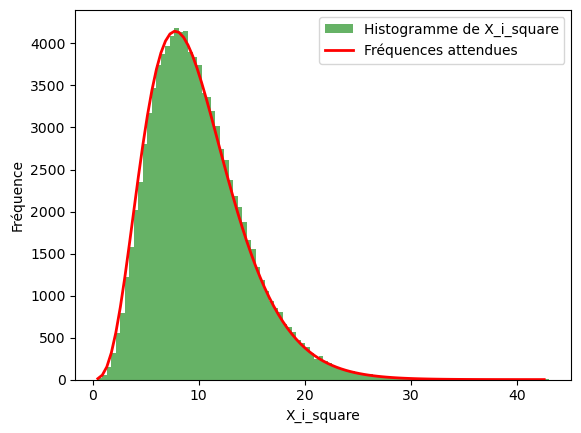

[21.40375748 31.27471314  6.68339982  6.56637047  5.40260797 15.43455443
  8.16696498 16.0526249   5.7494454 ]


In [7]:
#liste contenant la somme des X_i carrés :
X_i_square = np.zeros(nb)

for i in range(nb):
    X_i_square[i] = np.dot(x[i], x[i])

# histogramme des valeurs de X_i_square
observed_freq, bins, _ = plt.hist(X_i_square, bins=100, density=False, alpha=0.6, color='g', label='Histogramme de X_i_square')

# Calculer les fréquences attendues selon la loi du chi-carré
df = x.shape[1]  # Nombre de degrés de liberté
expected_freq = []
for i in range(len(bins) - 1):
    expected_freq.append(
        stats.chi2.cdf(bins[i + 1], df) - stats.chi2.cdf(bins[i], df)
    )
expected_freq = np.array(expected_freq) * len(X_i_square)
# Normaliser les fréquences attendues
expected_freq = expected_freq * (observed_freq.sum() / expected_freq.sum())
# Tracer les fréquences attendues
plt.plot(bins[:-1], expected_freq, 'r-', lw=2, label='Fréquences attendues')
# Effectuer le test du chi-carré
chi2_stat, p_value = stats.chisquare(observed_freq, expected_freq)

print(f"Chi2 Stat: {chi2_stat}, p-value: {p_value}")

# Afficher l'histogramme
plt.xlabel('X_i_square')
plt.ylabel('Fréquence')
plt.legend(loc='best')
plt.show()
print(X_i_square[0:9])


## Exercice 6 : Ecrire un générateur uniforme

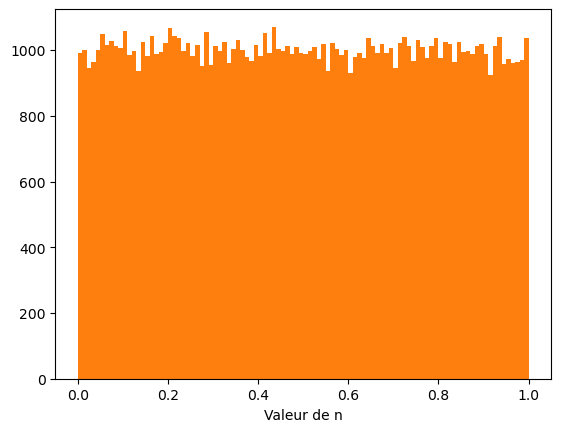

In [43]:
dim = 100000 # dimension de la liste

L = np.zeros(dim)
seed = 67676
L[0] = seed

m = 16807
mod = 2**31 - 1

for i in range(0, dim-1):
    L[i+1] = (m * L[i]) % mod

L = L / mod # on normalise pour obtenir des valeurs entre 0 et 1

plt.figure('histogramme')
plt.hist(L, bins=100, color='tab:orange', label='Histogramme')
plt.xlabel('Valeur de n')
plt.show()


45404
8
[2, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 0, 3, 1, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 3, 0, 1, 0, 1, 1, 0, 3, 0, 2, 0, 4, 0, 1, 1, 0, 0, 0, 3, 0, 2, 1, 1, 2, 0, 0, 0, 4, 0, 2, 0, 0, 1, 0, 2, 2, 1, 2, 1, 0, 0, 3, 0, 4, 0, 0, 3, 1, 4, 1, 0, 1, 1, 0, 0, 0, 0, 2, 3, 0, 3, 0, 1, 1, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 2, 2, 1, 1, 0, 2, 1, 2, 0, 3, 1, 2, 1, 2, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1, 3, 3, 0, 1, 0, 1, 1, 1, 2, 0, 1, 3, 0, 0, 0, 2, 2, 0, 1, 0, 3, 3, 0, 1, 0, 1, 2, 2, 1, 1, 3, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0, 3, 1, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 2, 2, 1, 0, 1, 3, 0, 1, 0, 2, 1, 1, 2, 0, 1, 3, 0, 0, 3, 2, 0, 2, 1, 1, 1, 3, 2, 0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 2, 0, 1, 3, 2, 0, 1, 4, 1, 2, 0, 0, 1, 1, 2, 4, 1, 0, 0, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 2

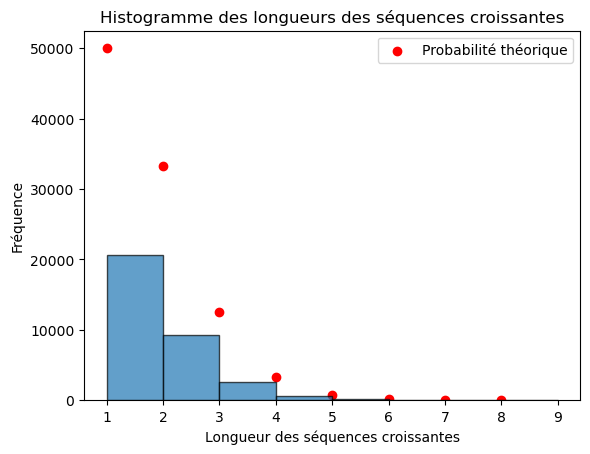

In [47]:
#Calcul de la longueur des séquences croissantes
longueurs = []
k=0
for i in range(0, dim-1):
    if L[i] < L[i+1]:
        k+=1
    else:
        longueurs.append(k)
        k=0

#Calcul probabilité d'avoir une séquence de longueur k
proba_seq = np.zeros(max+1)
for i in range(1, max+1):
    proba_seq[i] = dim * ((1/factorial(i))-(1/factorial(i+1)))


#histogramme des longueurs des séquences croissantes
plt.scatter(range(1, max+1), proba_seq[1:], color='red', label='Probabilité théorique')
plt.legend(loc='best')
max = np.max(longueurs)
i_max = np.argmax(longueurs)
print(i_max)
print(max)
print(longueurs)
plt.hist(longueurs, bins=range(1, max+2), edgecolor='black', alpha=0.7)
plt.xlabel('Longueur des séquences croissantes')
plt.ylabel('Fréquence')
plt.title('Histogramme des longueurs des séquences croissantes')
plt.show()